In [1]:
MIN = 0.5
MAX = 0.7

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 5)

In [3]:
dates = pd.date_range('2023-01-01', '2023-12-31', freq='H')
df = pd.DataFrame({
    'date_time': dates,
    'pressure': np.zeros(len(dates)),
})

low pressure during morning and evening due to high usage. low usage in the noon and night

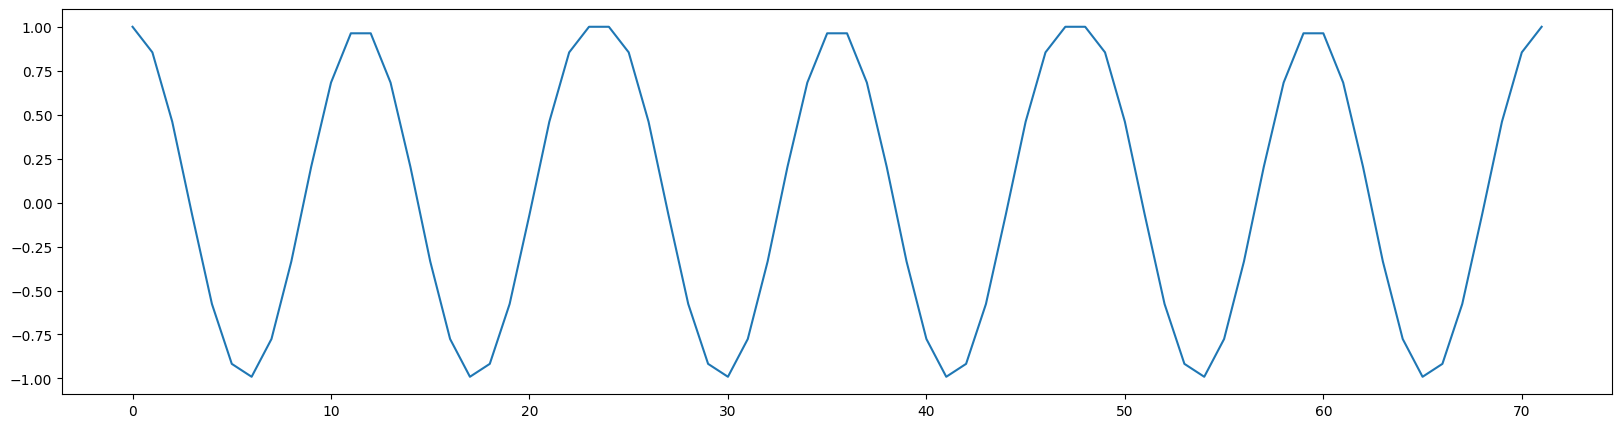

In [4]:
amplitude = 1
noon_correction_factor = 0.5

noon_hrs = range(int(24*3/8), int(24*5/8))

var_day = amplitude * np.cos(2 * np.pi * np.linspace(-1, 1, 24))

plt.plot(np.tile(var_day, 3))

Noon has little more usage than night

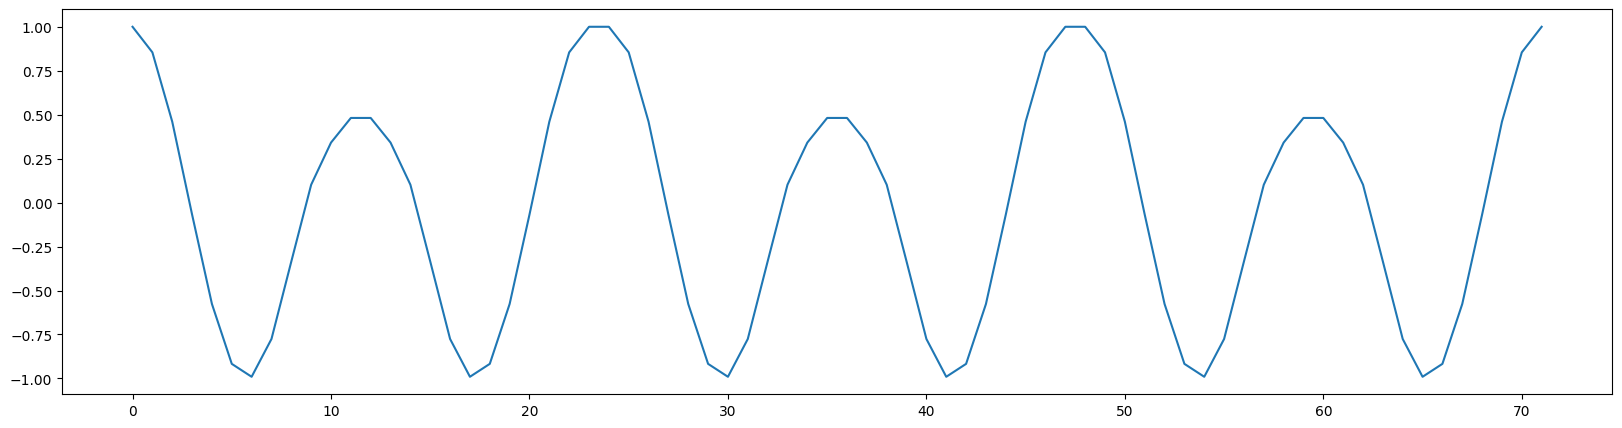

In [5]:
var_day[noon_hrs] = var_day[noon_hrs] * noon_correction_factor
plt.plot(np.tile(var_day, 3))

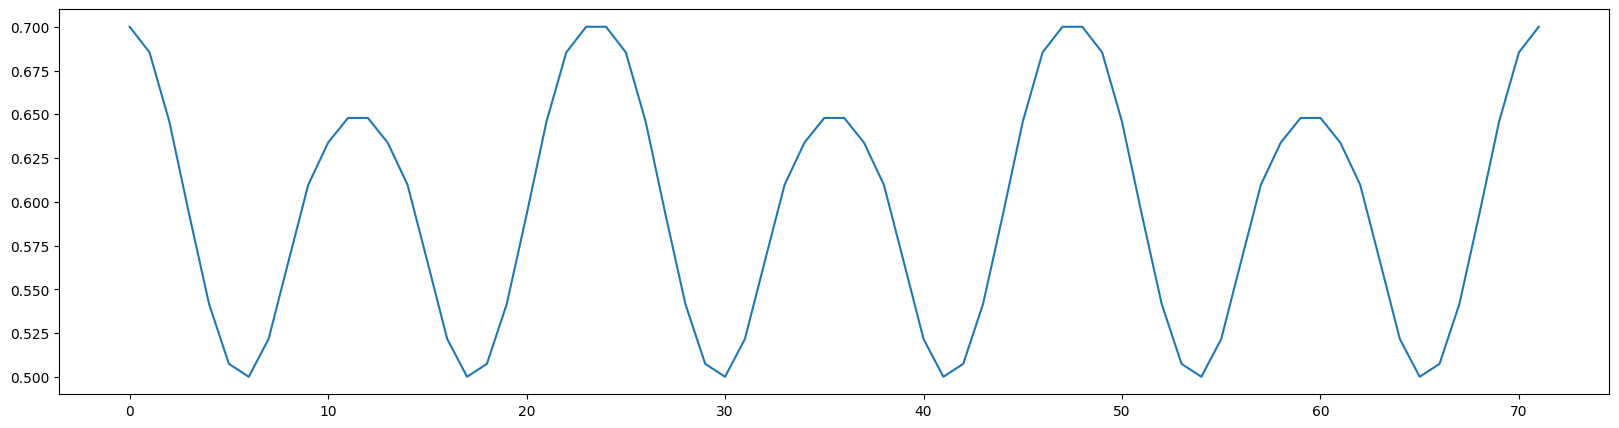

In [6]:
# Normalize
var_day = (var_day - var_day.min()) / (var_day.max() - var_day.min())
var_day = var_day * (MAX - MIN) + MIN

plt.plot(np.tile(var_day, 3))

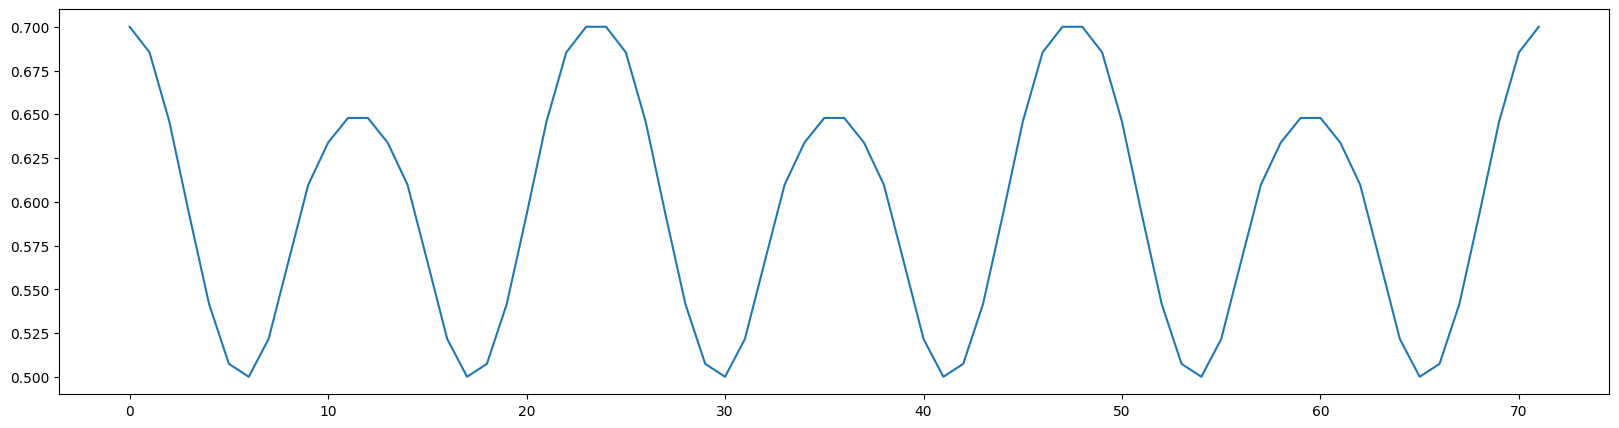

In [7]:
# Normalize
var_day = (var_day - var_day.min()) / (var_day.max() - var_day.min())
var_day = var_day * (MAX - MIN) + MIN

plt.plot(np.tile(var_day, 3))

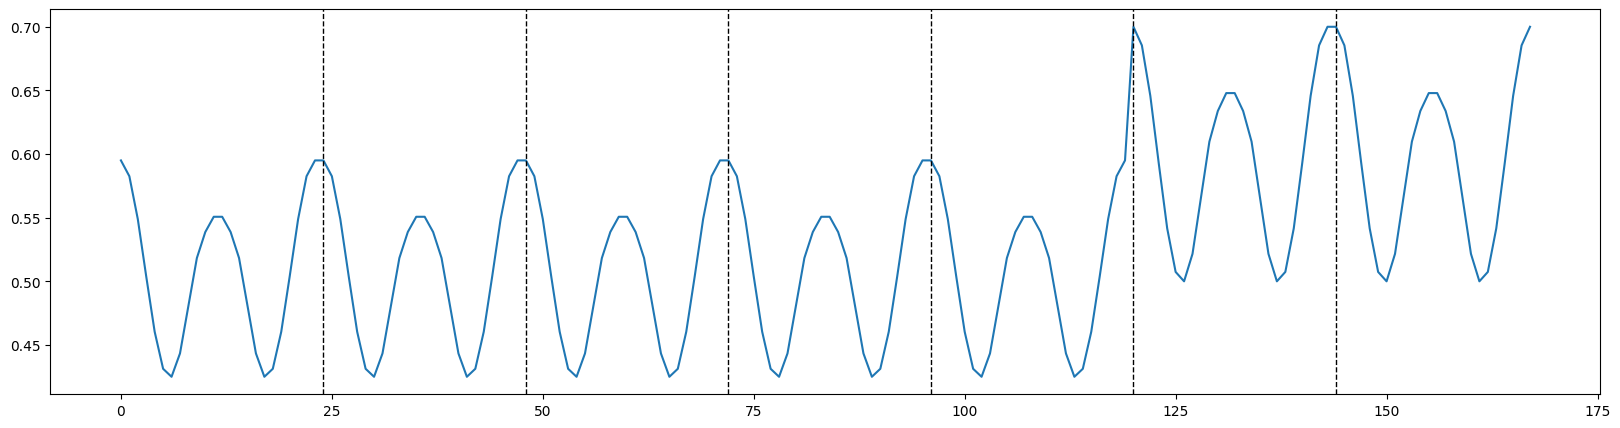

In [8]:
weekend_factor = 0.85
var_week = np.tile(var_day, 7)
var_week[:24*5] = var_week[:24*5] * weekend_factor

plt.plot(var_week)
for i in range(1, 7):
    plt.axvline(i*24, color='k', linestyle='--', linewidth=1)

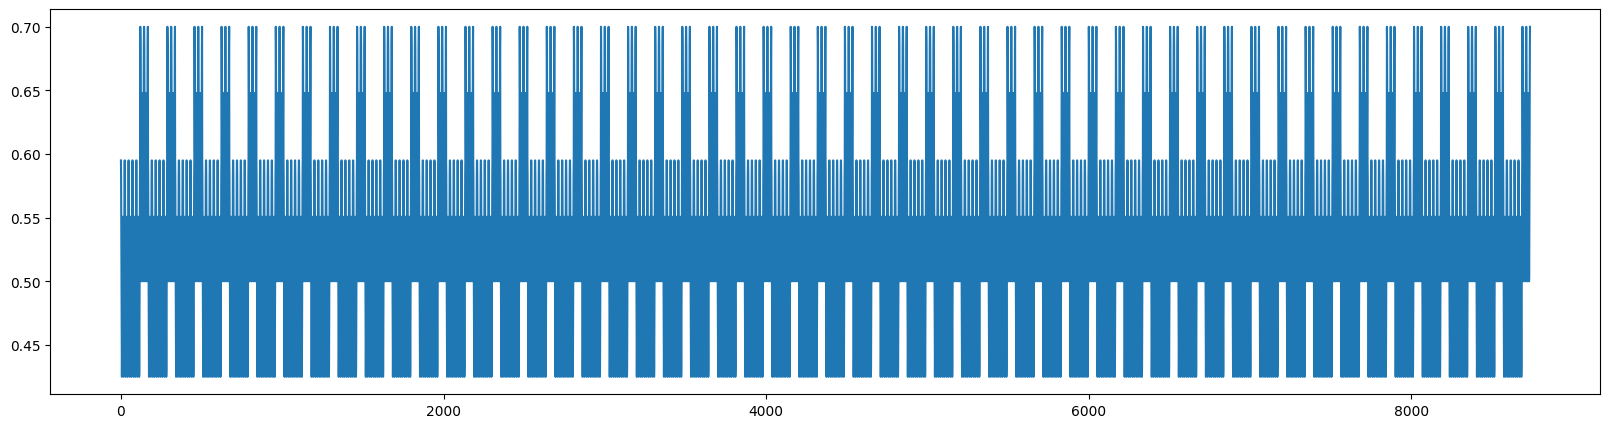

In [9]:
var_year = np.tile(var_week, 52)
plt.plot(var_year)

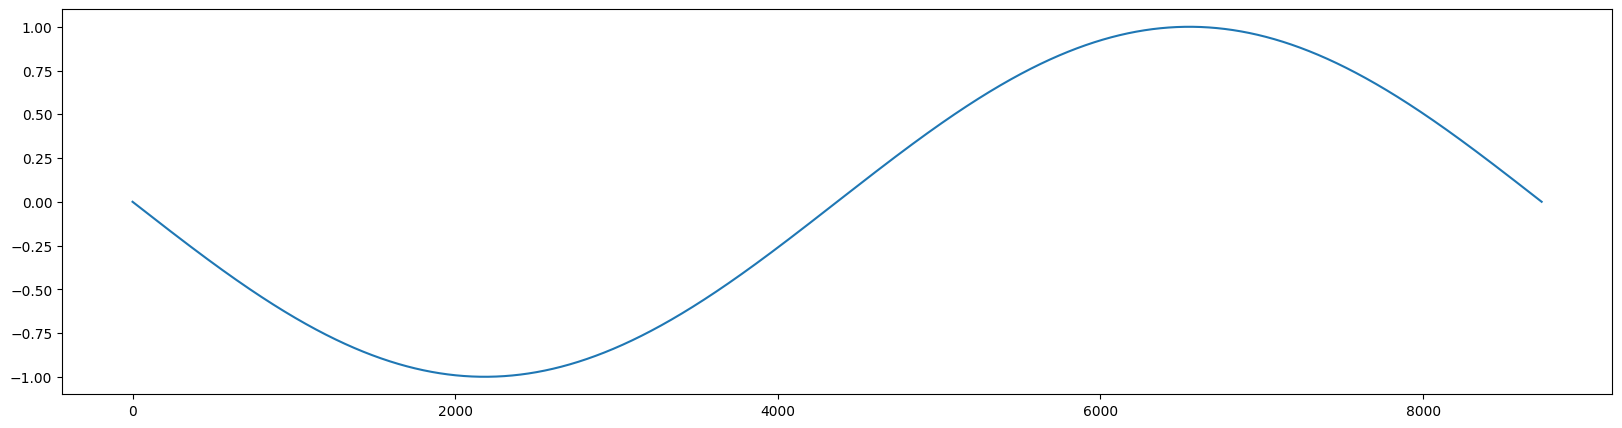

In [10]:
year_factor = - np.sin(np.linspace(0, 2*np.pi, len(var_year)))
plt.plot(year_factor)

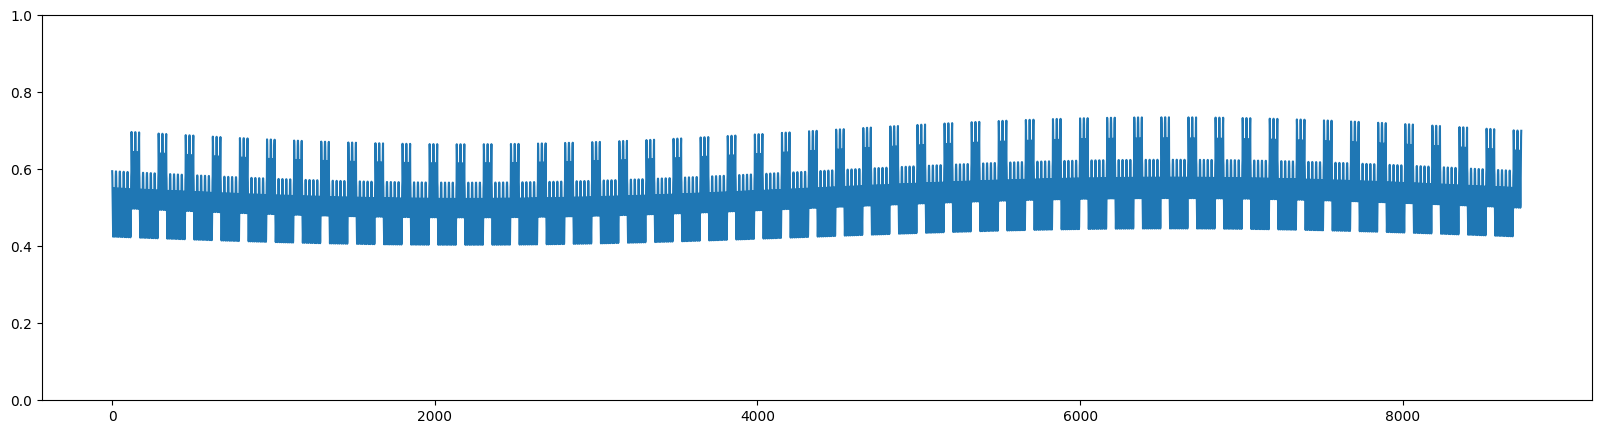

In [11]:
amplitude_M = 0.05
var_year = var_year * (1 + amplitude_M * year_factor)

plt.ylim((0, 1))
plt.plot(var_year)


In [13]:
# pad with zeroes to match df
df.pressure = np.pad(var_year, (0, len(df) - len(var_year)), 'constant', constant_values=var_year.mean())

In [14]:
df.to_csv('train.csv', index=False)